In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from math import sqrt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import mnist

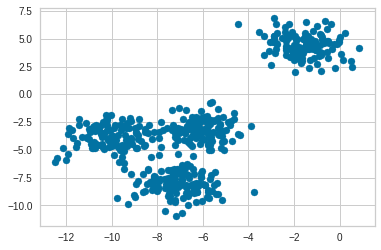

In [ ]:
X, _ = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
plt.scatter(X[:,0],X[:,1])
plt.show()


# Elbow curve

In [ ]:
scores = []
K = [2,3,4,5,6,7,8,9,10]
for k in K:
	km = KMeans(n_clusters=k).fit(X)
	scores.append(-km.score(X))

[3735.4056749295646, 1903.4503741659219, 908.3855684760613, 811.0400287842746, 727.2093347204212, 663.7928343459015, 581.849082580999, 525.154825850431, 472.22049860909885]


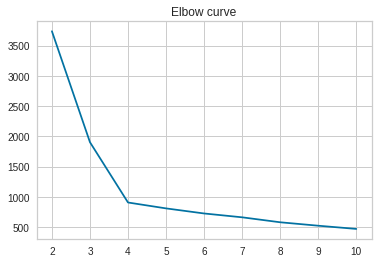

In [ ]:
print(scores)

plt.title("Elbow curve")
plt.plot(K,scores)
plt.show()

# Silhouette score

The silhouette score is a metric (ranging from -1 and 1) that evaluates the clusters consistency. It is obtained as the combination of two components: the mean intra cluster-distance (call it A), and the mean nearest cluster distance (call it B) for each sample. We compute the silhouette score as:

S = (B-A)/max(A,B)

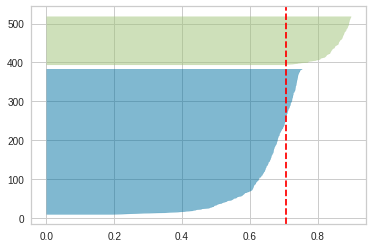

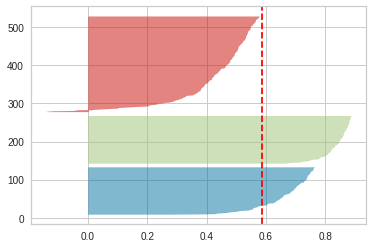

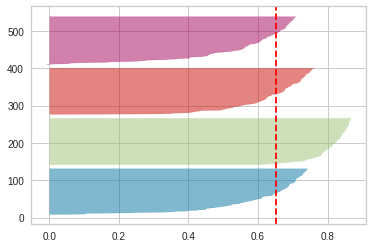

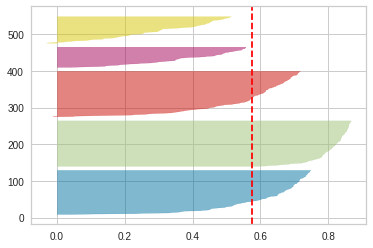

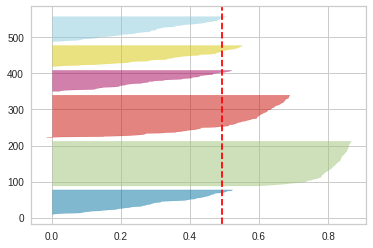

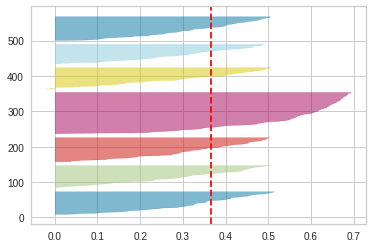

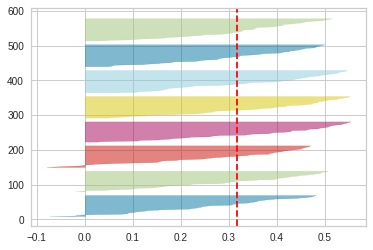

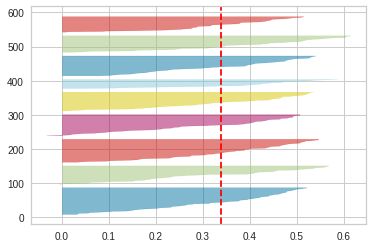

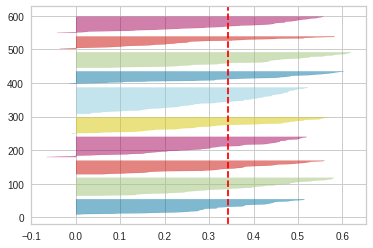

<Figure size 432x288 with 0 Axes>

In [ ]:
for k in K:
  km = KMeans(n_clusters=k).fit(X)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
  visualizer.fit(X)        # Fit the data to the visualizer
  plt.figure()


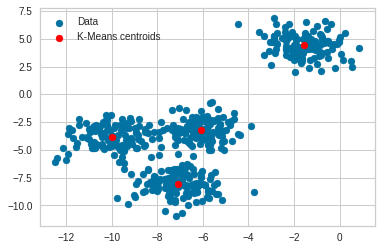

In [ ]:
km = KMeans(n_clusters=4).fit(X)

plt.scatter(X[:,0],X[:,1],label="Data")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",label="K-Means centroids")
plt.legend(loc="best")
plt.show()


# Image segmentation 

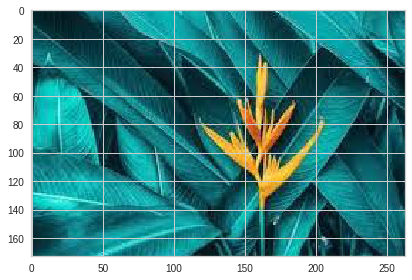

In [ ]:
from skimage import io
import matplotlib.image as image

img = io.imread("plant.jpg") # image reading
io.imshow(img)
io.show()

In [ ]:
img_normalized = (img / 255.0).reshape(img.shape[0]*img.shape[1],3) # -1 equivalent to img.shape[0]*img.shape[1] 

In [ ]:
K = 2
km = KMeans(n_clusters=K).fit(img_normalized)

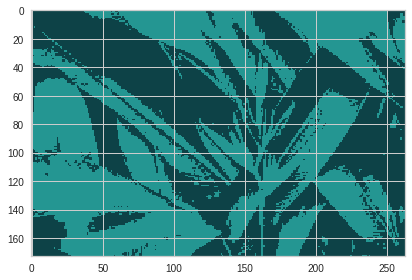

In [ ]:
img_segmented=km.cluster_centers_[km.labels_]
img_segmented=np.reshape(img_segmented, (img.shape))
io.imshow(img_segmented)
io.show()

# Anomaly detection (toy example)

In [ ]:
X, _ = make_blobs(n_samples=100, n_features=2,centers=1,random_state=15)
A, _ = make_blobs(n_samples=50, n_features=2,centers=2,random_state=30)

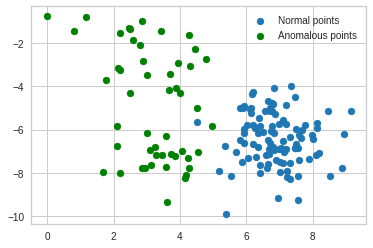

In [ ]:
plt.scatter(X[:,0],X[:,1], c='#1f77b4',label="Normal points")
plt.scatter(A[:,0],A[:,1], c='green', label="Anomalous points")
plt.legend(loc="best")
plt.show()

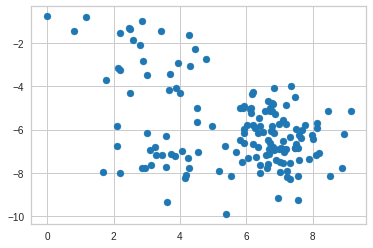

In [ ]:
plt.scatter(X[:,0],X[:,1], c='#1f77b4')
plt.scatter(A[:,0],A[:,1], c='#1f77b4')
plt.show()

In [ ]:
# We fit the K-Means only on normal points
km = KMeans(n_clusters=1).fit(X)

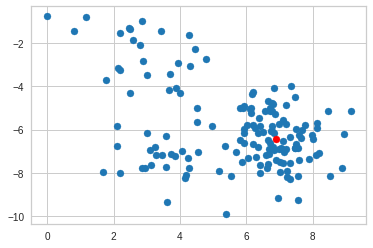

In [ ]:
plt.scatter(X[:,0],X[:,1], c='#1f77b4')
plt.scatter(A[:,0],A[:,1], c='#1f77b4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red")
plt.show()

In [ ]:
def euclidean_distance(x1,y1,x2,y2):
	return sqrt(pow((x1-x2),2)+pow(y1-y2,2))

In [ ]:
distances = []

# Threshold computation
for x in X:
	d = euclidean_distance(x[0],x[1],km.cluster_centers_[:,0],km.cluster_centers_[:,1])
	distances.append(d)

In [ ]:
threshold = np.median(distances)+np.std(distances)

In [ ]:
anomalies = []

for x in A:
  d = euclidean_distance(x[0],x[1],km.cluster_centers_[:,0],km.cluster_centers_[:,1])
	# if the distance of the point is greater than the threshold, then it is considered an anomaly
  if d > threshold:
    anomalies.append(x)

anomalies = np.array(anomalies)

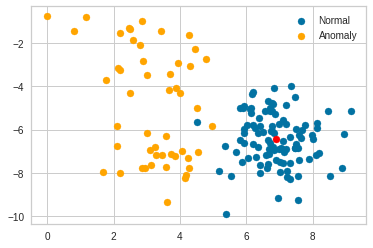

In [ ]:
plt.scatter(X[:,0],X[:,1],label="Normal")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red")
plt.scatter(anomalies[:,0],anomalies[:,1],color="orange",label="Anomaly")
plt.legend(loc="best")
plt.show()

# Autoencoders

In [ ]:
X, _ = make_blobs(n_samples=1000, n_features=10,centers=1,random_state=15)
A, _ = make_blobs(n_samples=100, n_features=10,centers=2,random_state=30)

In [ ]:
X_train_normal = X[0:900]

In [ ]:
X_test_normal = X[900:]

In [ ]:
X_test_anomaly = A

In [ ]:
X_train_normal.shape

(900, 10)

In [ ]:
X_test_normal.shape

(100, 10)

In [ ]:
X_test_anomaly.shape

(100, 10)

In [ ]:
# Autoencoder model definition

model = Sequential()
model.add(Dense(5,activation="relu",input_shape=(10,)))
model.add(Dense(3,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(10,activation="linear"))
model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 5)                 55        
                                                                 
 dense_30 (Dense)            (None, 3)                 18        
                                                                 
 dense_31 (Dense)            (None, 5)                 20        
                                                                 
 dense_32 (Dense)            (None, 10)                60        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model training
history = model.fit(X_train_normal,X_train_normal,shuffle=True,epochs=1000,verbose=1,validation_split=0.15,
  callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
	            ModelCheckpoint("autoencoder.h5",monitor='val_loss', save_best_only=True, mode='min', verbose=0)])
# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: ignored

In [ ]:
get_layer_output = K.function([model.layers[0].input],[model.layers[1].output])
code_layer = get_layer_output([X_train_normal])[0]
code_layer.shape

(900, 3)

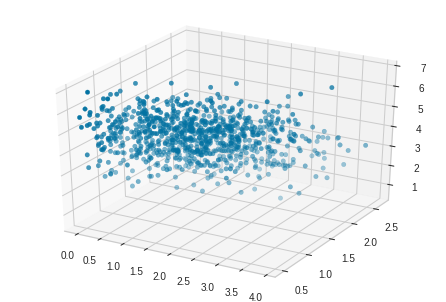

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(code_layer[:,0],code_layer[:,1],code_layer[:,2])
plt.show()

In [ ]:
errors = []

# Compute the average reconstruction error on train samples
for sample in X_train_normal:
  reconstruction = model.predict(np.array([sample]))
  reconstruction_error = mean_squared_error(np.array([sample]),reconstruction)
  errors.append(reconstruction_error)


In [ ]:
np.mean(errors)

1.020745936817359

In [ ]:
threshold = np.median(errors) + np.std(errors)

In [ ]:
anomaly_counter = 0

for sample in X_test_normal:
  reconstruction = model.predict(np.array([sample]))
  reconstruction_error = mean_squared_error(np.array([sample]),reconstruction)
  if reconstruction_error > threshold:
    anomaly_counter += 1 

print(anomaly_counter)

11


In [ ]:
anomaly_counter = 0

for sample in X_test_anomaly:
  reconstruction = model.predict(np.array([sample]))
  reconstruction_error = mean_squared_error(np.array([sample]),reconstruction)
  if reconstruction_error > threshold:
    anomaly_counter += 1 

print(anomaly_counter)

100


# Denoising Autoencoders

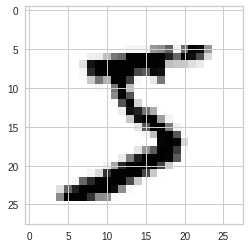

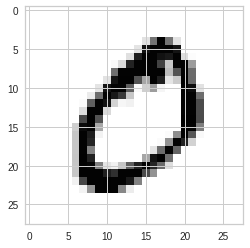

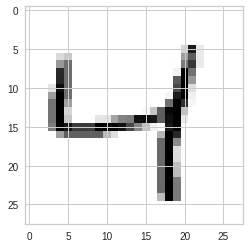

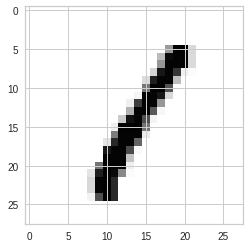

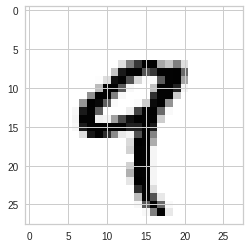

In [17]:
# Data loading
(X_train,y_train), (X_test,y_test) = mnist.load_data() # 28x28 pixel data

# Data visualization
for i in range(5):
  plt.figure()
  plt.imshow(X_train[i])

# Data preprocessing
X_train = X_train.reshape(len(X_train),784) # reshape data into a flat array of 784 pixels (28x28 = 784)
X_test = X_test.reshape(len(X_test),784) # reshape test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Data normalization
X_train /= 255
X_test /= 255

In [18]:
noise_factor = 0.3
# Adding noise
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.) # necessary to ensure that we have values within the range 0-1
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

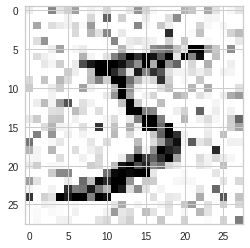

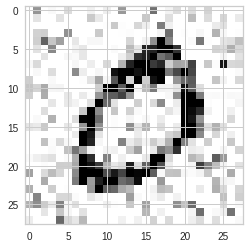

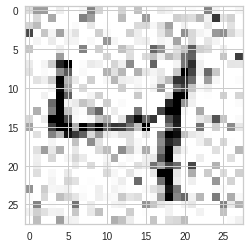

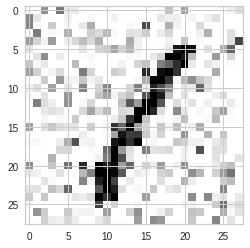

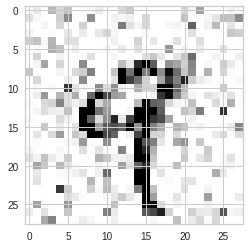

In [19]:
for i in range(5):
  plt.figure()
  plt.imshow(X_train_noisy[i].reshape((28,28)))

In [20]:
X_train_noisy.shape

(60000, 784)

In [21]:
X_test_noisy.shape

(10000, 784)

In [22]:
model = Sequential()
model.add(Dense(512,activation="relu",input_shape=(784,)))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(784,activation="relu"))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 784)               402192    
                                                                 
Total params: 1,132,944
Trainable params: 1,132,944
No

Epoch 1/1000
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0234 - val_loss: 0.0169
Epoch 2/1000
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0159 - val_loss: 0.0153
Epoch 3/1000
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0144 - val_loss: 0.0142
Epoch 4/1000
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0135 - val_loss: 0.0137
Epoch 5/1000
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0130 - val_loss: 0.0134
Epoch 6/1000
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0124 - val_loss: 0.0130
Epoch 7/1000
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0120 - val_loss: 0.0126
Epoch 8/1000
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0118 - val_loss: 0.0127
Epoch 9/1000
1594/1594 [==============================] - 19s 12ms/step - loss: 0.0116 - val_loss: 0.0124
Epoch 10/1000
1594/1594 [=====================

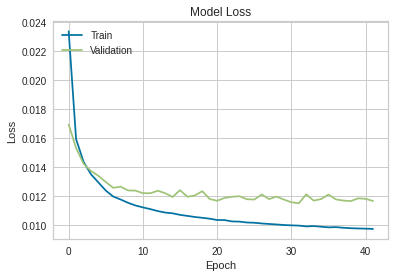

In [23]:
# Model training
history = model.fit(X_train_noisy,X_train,shuffle=True,epochs=1000,verbose=1,validation_split=0.15,
  callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
	            ModelCheckpoint("denoising_ae.h5",monitor='val_loss', save_best_only=True, mode='min', verbose=0)])
# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
denoised_images = model.predict(X_test_noisy)

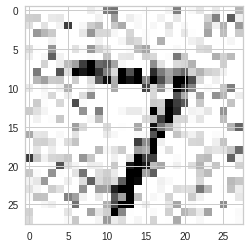

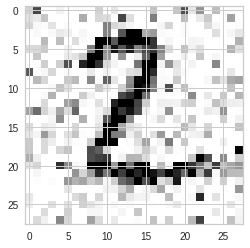

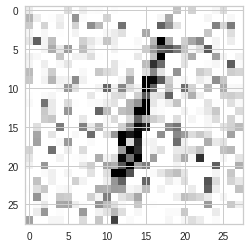

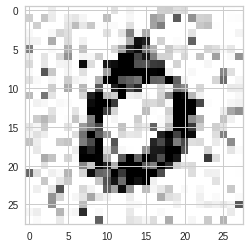

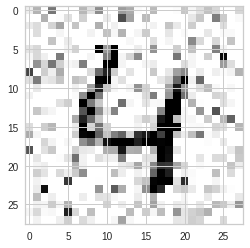

In [25]:
for i in range(5):
  plt.figure()
  plt.imshow(X_test_noisy[i].reshape((28,28)))

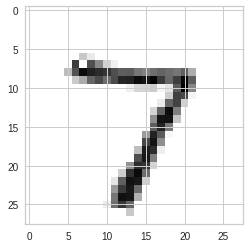

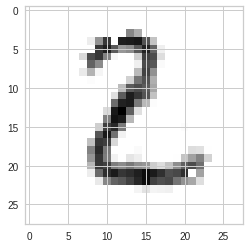

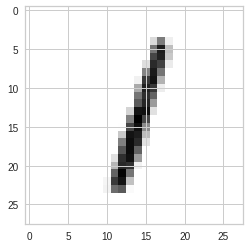

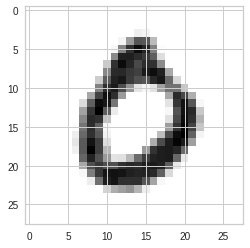

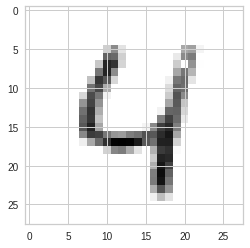

In [26]:
for i in range(5):
  plt.figure()
  plt.imshow(denoised_images[i].reshape((28,28)))